In [51]:
import pandas as pd
twits_raw = pd.read_csv("data/twitter_training.csv", header=None, 
            names=['id', 'category','polarity', 'text'])
twits_raw.head(35)

,id,category,polarity,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [52]:
print(twits_raw.shape)
twits_raw =  twits_raw.dropna()
print(twits_raw.shape)

(74682, 4)
(73996, 4)


In [53]:
some_text = twits_raw.loc[0, 'text']
some_text

'im getting on borderlands and i will murder you all ,'

In [54]:
import re

def split_and_clean(text):
    words = re.split(r'\s+', text)
    cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]
    cleaned_words = [word.lower() for word in cleaned_words if word]
    return cleaned_words

split_and_clean(some_text)

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all']

In [55]:
vocabulary = [w for t in twits_raw.text for w in split_and_clean(t)]
vocabulary[:10]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all']

In [56]:
from collections import Counter
voc_counter = Counter(vocabulary)
voc_counter.most_common(20)

[('the', 44446),
 ('i', 29238),
 ('to', 28833),
 ('and', 26593),
 ('a', 24163),
 ('of', 19444),
 ('is', 17829),
 ('for', 15610),
 ('in', 15407),
 ('this', 14666),
 ('it', 13794),
 ('you', 12164),
 ('on', 12056),
 ('my', 11843),
 ('that', 10238),
 ('with', 8861),
 ('game', 8066),
 ('so', 7797),
 ('me', 6998),
 ('have', 6682)]

In [ ]:
vocabulary = [word for word, counter in voc_counter.items() if counter > 10]
vocabulary[:10]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all']

In [58]:
len(vocabulary)

7209

In [13]:
twits_raw.head(3)

,id,category,polarity,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=20, token_pattern=r'\b[a-zA-Z]+\b')
X = vectorizer.fit_transform(twits_raw['text'])

In [60]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1135695 stored elements and shape (73996, 4578)>

In [17]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bag_of_words_df.head(10)

,a,aaa,abandon,abilities,ability,able,about,above,absolute,absolutely,...,zelda,zen,zero,zoe,zombie,zombies,zone,zonestream,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)  # Select the number of components you want to keep
principal_components = pca.fit_transform(bag_of_words_df)

In [66]:
principal_components[:5]

array([[-0.25634305,  0.73201757,  0.02812144, -0.18691275],
       [ 0.95565782,  0.73703714,  0.51038725,  0.65575531],
       [-0.25451682,  0.73323248,  0.02785587, -0.18445204],
       [-0.2601418 ,  0.72894735,  0.02764381, -0.18363683],
       [-0.20091249,  0.77256366, -0.0011428 , -0.18525718]])

In [62]:
import numpy as np
pc1 = pca.components_[0]
pc1_df = pd.Series(pc1, index=bag_of_words_df.columns)
pc1_df
pc1_df.sort_values(key=np.abs, ascending=False).head(10)


the    0.525663
i      0.444398
to     0.326793
and    0.309866
a      0.218692
it     0.192617
of     0.182050
in     0.114989
is     0.111995
for    0.110770
dtype: float64

In [63]:
pc1

array([ 2.18692321e-01,  1.87691173e-04,  5.44314609e-04, ...,
       -2.58780258e-04,  3.85765777e-04,  1.93201907e-04])

In [30]:
pca.explained_variance_ratio_

array([0.07314473, 0.03626727, 0.02356906, 0.0192615 ])

<Axes: xlabel='PC1', ylabel='PC2'>

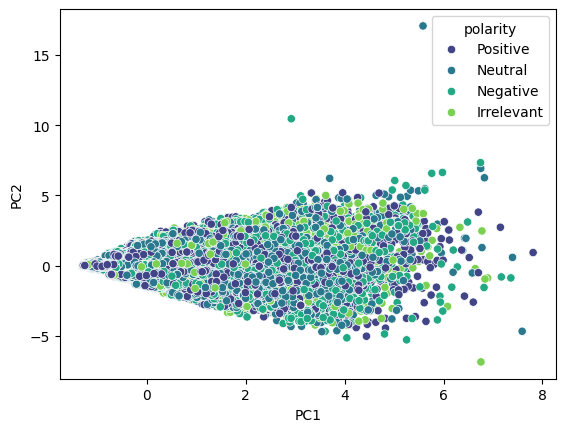

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with the principal components
principal_components=principal_components[:,:2]
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
principal_df['polarity'] = twits_raw.polarity

sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='polarity', palette='viridis')

In [68]:
PCA_COMPONENTS = 100

pca = PCA(n_components=PCA_COMPONENTS)  # Select the number of components you want to keep
principal_components = pca.fit_transform(bag_of_words_df)
pca.explained_variance_ratio_

array([0.07314473, 0.03626727, 0.0235691 , 0.01926457, 0.01755002,
       0.01681104, 0.01553266, 0.0137644 , 0.01341385, 0.01308851,
       0.01295419, 0.0112293 , 0.0107888 , 0.00951797, 0.00933677,
       0.00925618, 0.00907157, 0.00854068, 0.00802108, 0.00792921,
       0.00746453, 0.00658845, 0.00629107, 0.00608841, 0.0056214 ,
       0.00552001, 0.00539083, 0.0052178 , 0.00505978, 0.00478743,
       0.0047382 , 0.00447525, 0.00435858, 0.00433347, 0.0042153 ,
       0.00407543, 0.00396481, 0.00384933, 0.00378033, 0.00374042,
       0.00359945, 0.00355413, 0.0034606 , 0.00333484, 0.00330562,
       0.00325487, 0.00319332, 0.00311811, 0.00309653, 0.00306666,
       0.00302744, 0.00292549, 0.00285391, 0.00282491, 0.00273655,
       0.00271109, 0.00264481, 0.00260225, 0.00254433, 0.00249216,
       0.00247916, 0.0024477 , 0.00241714, 0.00239795, 0.00234526,
       0.00232866, 0.00229509, 0.00228602, 0.0022687 , 0.00224189,
       0.00222262, 0.00218975, 0.00214726, 0.00212042, 0.00207

In [69]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.5772618957050195

Lets build a dataset for training a neural network on those data

In [70]:
import torch
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [71]:
X = principal_components
X.shape

(73996, 100)

In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(twits_raw.polarity)
y[:6]

array([3, 3, 3, 3, 3, 3])

In [22]:
y.shape

(73996,)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59196, 100), (14800, 100), (59196,), (14800,))

In [74]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(
    torch.tensor(X_train, dtype=torch.float), 
    torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(
    torch.tensor(X_test, dtype=torch.float), 
    torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)


In [75]:
data, label = next(iter(train_loader))
data.shape, label.shape

(torch.Size([100, 100]), torch.Size([100]))

In [76]:
# Define the custom model class
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(PCA_COMPONENTS, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 4)
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, xs):
        x = self.layer1(xs).tanh()
        x = self.layer2(x).tanh()
        x = self.layer3(x)
        # x = self.softmax(x)
        return x
    
mymodel = MyModel().to(device)
sum([n.nelement() for n in mymodel.parameters()])

2524

In [77]:
predicted = mymodel(data.to(device))
predicted.shape

torch.Size([100, 4])

In [78]:
nn.CrossEntropyLoss()(predicted, label.to(device))

tensor(1.3960, grad_fn=<NllLossBackward0>)

In [79]:
import torch.optim as optim

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mymodel.parameters(), lr=0.01)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    mymodel.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # forward pass
        outputs = mymodel(X_batch)
        loss = loss_fn(outputs, y_batch)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # update
        optimizer.step()
        running_loss += loss.item()
    if epoch % (num_epochs // 10) == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")

print("Training complete")


Epoch [1/30], Loss: 1.18128111938367
Epoch [4/30], Loss: 1.1019708854523864
Epoch [7/30], Loss: 1.0703632666452512
Epoch [10/30], Loss: 1.0531711851221484
Epoch [13/30], Loss: 1.0436012524406653
Epoch [16/30], Loss: 1.0368233437876444
Epoch [19/30], Loss: 1.0314905483376335
Epoch [22/30], Loss: 1.0267387284217655
Epoch [25/30], Loss: 1.0235478979711596
Epoch [28/30], Loss: 1.0219656302518136
Training complete


In [80]:
# Evaluation loop
mymodel.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = mymodel(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 51.78378378378378%


You can play with all the parameters, but the accuracy might not significantly improves. So processing text need other ideas in order to perform correctly.